# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Ginanti Riski
- Email: a788xbm186@devacademy.id
- Id Dicoding: a788xbm186

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib

### Menyiapkan data yang akan diguankan

In [4]:
df = pd.read_csv('employee_data.csv')

## Data Understanding

Disini kita melihat banyak baris yang tertulis sebagai `NaN` atau `Null` artinya ada data yang kosong atau tidak lengkap.

In [5]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Dari hasil pengecekkan bahwa data employee ini terdiri dari 1470 data, namun pada variabel `Attrition` hanya terdapat 1058, artinya ada 412 data kosong didalam `Attrition`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Dan benar setelah dicek, ada 412 data yang hilang pada variabel `Attrition`, maka kita perlu tangani nanti pada tahap preprocessing agar model dapat belajar dengan baik

In [7]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Dari hasil pengecekkan, tidak terdapat data yang duplikat pada dataframe `df`

In [8]:
df.duplicated().sum()

np.int64(0)

**Hasil Analisis:**

1. Permasalahan pada Data

- **Missing Values pada Target (`Attrition`)**
  - Jumlah data pada `Attrition` hanya 1.058, sedangkan kolom lain memiliki 1.470 data.
  - Artinya, terdapat **412 baris (≈28%)** yang tidak memiliki label `Attrition`.
  - ➔ Perlu ditangani sebelum modeling (bisa dengan *drop* atau *imputasi*).

- **Constant Features (Tidak Ada Variasi)**
  - `EmployeeCount` selalu bernilai 1.0.
  - `StandardHours` selalu bernilai 80.0.
  - ➔ Kolom-kolom ini tidak memberikan informasi dan **sebaiknya dihapus**.

2. Distribusi Target (`Attrition`)

- **Mean Attrition ≈ 0.169** ➔ Attrition rate sekitar **17%**.
- Berarti, sekitar **83% karyawan bertahan** dan **17% karyawan keluar**.
- ➔ Distribusi target cukup *imbalanced*, namun masih bisa ditangani.

3. Karakteristik Demografi & Pengalaman Kerja

- **Usia**
  - Rata-rata: 36.9 tahun.
  - Rentang: 18 – 60 tahun.
  
- **Total Working Years**
  - Rata-rata ≈ 11.3 tahun.
  - Median 10 tahun.
  - Maksimum hingga 40 tahun.
  
- **Years at Company**
  - Rata-rata ≈ 7 tahun.
  - Median 5 tahun.
  - Terdapat karyawan baru (min = 0).

➔ Banyak karyawan sudah bekerja cukup lama, tetapi juga ada banyak *new joiners*.

4. Jarak Rumah ke Kantor

- **Distance From Home**
  - Rata-rata ≈ 9.2 km.
  - Median ≈ 7 km.
  - 75% karyawan tinggal ≤14 km dari kantor.
  - Jarak maksimal hingga 29 km.

➔ Sebagian besar karyawan tinggal relatif dekat dengan kantor.

5. Aspek Kepuasan Kerja

- **Environment Satisfaction**
  - Mean ≈ 2.72 (skala 1–4).
  - Median 3 → Tingkat kepuasan cenderung "Medium–High".

- **Relationship Satisfaction**
  - Mean ≈ 2.71.
  - Median 3 → Mirip dengan environment satisfaction.

- **Work Life Balance**
  - Mean ≈ 2.76.
  - Median 3 → Mayoritas merasa "Good–Excellent" terkait keseimbangan kerja dan hidup.

➔ Umumnya kepuasan kerja dan work–life balance sudah positif, tetapi tetap ada ruang untuk perbaikan.

6. Gaji dan Insentif

- **Daily Rate**
  - Rata-rata: 802.

- **Hourly Rate**
  - Rata-rata: 65.

- **Stock Option Level**
  - Mean ≈ 0.79 (skala 0–3).

➔ Terdapat variasi besar dalam kompensasi.
➔ Penting untuk dianalisis apakah kompensasi berpengaruh terhadap keputusan keluar/bertahan.

In [9]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


hasil visualisasi juga menunjukkan bahwa distribusi 0 (Tidak Attrition) lebih banyak dibanding dengan 1 (Attrition) yang artinya data ini tidak seimbang jika dilihat dari distibusi targetnya

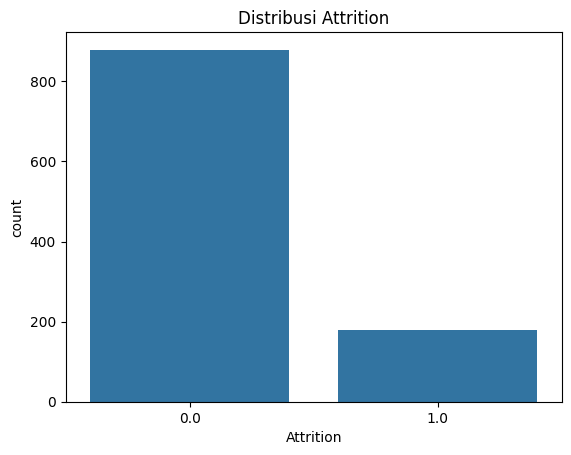

In [10]:
#Distribusi target
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.show()

## Data Preparation / Preprocessing

Setelah kita mengetahui ada data yang kosong di `Attrition` maka kita perlu hapus data yang kosong itu, ada variabel yang tidak relevan yaitu `EmployeeId`, `Over18`, `StandardHours` maka kita hapus juga, dan ada variabel yang masih dalam bentuk object atau string maka kita perlu lakukan encoding agar datanya berupa numerik menggunakan LabelEncoder. setelah itu datanya distandarisasi menggunakan StandardScaler dan data yang tidak seimbang tadi kita perlu oversampling menggunakan Random Oversampling.

In [11]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    # 1. Drop missing values
    df.dropna(inplace=True)
    # 2. Drop kolom yang tidak relevan
    df.drop(['EmployeeId', 'Over18', 'StandardHours'], axis=1, inplace=True)
    # 3. Encode kategori dengan LabelEncoder
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    # 4. Scaling numerik (kecuali target)
    num_cols = df.select_dtypes(include=[np.number]).columns.drop('Attrition')
    df[num_cols] = StandardScaler().fit_transform(df[num_cols])
    # 5. Oversampling kelas minoritas
    df_major = df[df.Attrition == 0]
    df_min = df[df.Attrition == 1]
    df_min_up = resample(
        df_min,
        replace=True,
        n_samples=len(df_major),
        random_state=42
    )
    df_bal = pd.concat([df_major, df_min_up]).sample(frac=1, random_state=42).reset_index(drop=True)
    return df_bal

# Terapkan preprocessing
df_pre = preprocess(df)
print("Distribusi kelas setelah oversampling:\n", df_pre['Attrition'].value_counts())
df_pre.head()

Distribusi kelas setelah oversampling:
 Attrition
1.0    879
0.0    879
Name: count, dtype: int64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.856452,1.0,-0.909013,-1.701122,1.421578,0.500415,0.117350,2.071746,0.0,-1.567739,...,-0.420551,-1.583600,-0.911148,-0.553591,0.945126,-2.494430,-0.329788,-0.348715,-0.674714,-1.151606
1,1.163541,1.0,0.596051,-0.449545,-0.514110,-0.992715,-0.852624,-0.947410,0.0,-1.567739,...,-0.420551,1.167547,-0.911148,1.443254,-0.590885,0.334195,-0.968534,-1.178416,-0.674714,-1.151606
2,-0.962768,1.0,0.596051,0.851017,-0.514110,-0.868288,1.087325,0.562168,0.0,-1.567739,...,-0.420551,1.167547,-0.911148,-0.803197,0.945126,-1.080117,-0.649161,-0.625282,-0.062232,-0.595640
3,1.376172,1.0,0.596051,0.145627,1.421578,-0.743860,-0.852624,-0.192621,0.0,-1.567739,...,-0.420551,0.250498,-0.911148,-1.052803,-0.590885,0.334195,-0.649161,-0.625282,-0.674714,-0.595640
4,0.950910,0.0,-0.909013,0.983278,1.421578,-0.495005,1.087325,-0.192621,0.0,-1.567739,...,2.377833,0.250498,-0.911148,0.320028,0.945126,0.334195,0.308959,0.480986,-0.674714,1.072257


## Modeling

Disini kita pisahkan Fitur dengan Target, target nya adalah Attrition, lalu kita bagi datanya menjadi 80% untuk training dan 20% untuk testing, dan shape dataset tersebut adalah Training set: (1406, 31), Test set: (352, 31).

artinya :
1. data di training ada sebanyak 1406 data dengan 31 variabel
2. data di test ada sebanyak 352 dengan 31 variabel

ini masuk akal karena:
1. Data setelah oversampling jadi 1.758 baris (879 + 879).
2. 20% test → 0.2 × 1758 ≈ 352 test data.

Sisanya 1406 train data.

In [12]:
X = df_pre.drop('Attrition', axis=1)
y = df_pre['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1406, 31), Test set: (352, 31)


**Insight Training Random Forest**

**Proses yang Dilakukan:**
- Model **RandomForest** telah dibuat dan dilatih menggunakan parameter default.
- Akurasi pada data training dihitung dan dicetak untuk melihat seberapa baik model mengenali pola dalam data training.

**Interpretasi Nilai Training Accuracy:**
-**training accuracy** sangat tinggi (1.0), itu **normal** untuk Random Forest karena ensemble tree biasanya sangat kuat di training set.
- Karena ini baru akurasi di **training set** saja, kita **belum bisa menilai generalisasi** model ke data baru (perlu cek akurasi di test set juga).

**Catatan:**
- Random Forest cenderung sangat kuat dalam menangkap pola di data training.
- Evaluasi lengkap baru bisa dilakukan setelah membandingkan hasil di **training** dan **testing**.


In [13]:
# 1. Buat objek RandomForest dengan parameter default
rf = RandomForestClassifier(random_state=42)
# 2. Latih model pada data training
rf.fit(X_train, y_train)
# 3. Cetak skor pada data training untuk referensi
train_score = rf.score(X_train, y_train)
print(f"Training accuracy: {train_score:.4f}")

Training accuracy: 1.0000


## Evaluation

**Insight Hasil Evaluasi Model Random Forest**

**Hasil Evaluasi di Data Test:**
- **Accuracy**: 97.73% (`Test accuracy: 0.9773`)
- **ROC AUC Score**: 0.999 (`ROC AUC Score: 0.9989992252066116`)

**Interpretasi:**
- Model sangat baik dalam membedakan karyawan yang **bertahan** (0.0) dan **keluar** (1.0).
- **Precision dan recall** tinggi di kedua kelas → sangat sedikit salah prediksi.
- **F1-score** seimbang di kedua kelas (0.98) → menunjukkan keseimbangan antara precision dan recall.
- **ROC AUC** hampir sempurna (0.999) → model sangat kuat dalam memisahkan dua kelas.
- Tidak terlihat gejala overfitting berat, karena **training accuracy** (sangat tinggi) masih cukup sejalan dengan **test accuracy**.

**Kesimpulan:**
- Model Random Forest ini sangat baik untuk tugas prediksi attrition.
- Bisa digunakan, namun sebaiknya tetap dilakukan validasi lebih lanjut seperti **cross-validation** untuk memastikan kestabilan performa model.


In [14]:
# Prediksi pada data test
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Laporan klasifikasi
print(classification_report(y_test, y_pred))
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)
# Test Accuracy
test_acc = rf.score(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       176
         1.0       0.97      0.99      0.98       176

    accuracy                           0.98       352
   macro avg       0.98      0.98      0.98       352
weighted avg       0.98      0.98      0.98       352

ROC AUC Score: 0.9989992252066116
Test accuracy: 0.9773


In [15]:
# Simpan model Random Forest ke file
joblib.dump(rf, 'random_forest_model1.pkl')

print("Model berhasil disimpan sebagai 'random_forest_model.pkl'")

Model berhasil disimpan sebagai 'random_forest_model.pkl'


In [16]:
!pip install pipreqs

In [17]:
!pip install nbconvert pipreqs

In [19]:
# 1. Konversi notebook (misal pipeline.ipynb) jadi .py
!jupyter nbconvert --to script HRD.ipynb --output hrd



[NbConvertApp] Converting notebook HRD.ipynb to script
[NbConvertApp] Writing 3597 bytes to hrd.txt


In [20]:
!sed '/^[!%]/d' hrd.txt > hrd_clean.py

In [22]:
!pipreqs . --force --savepath requirements.txt


INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in requirements.txt


In [23]:
!cat requirements.txt


joblib==1.4.2
matplotlib==3.10.1
numpy==2.2.5
pandas==2.2.3
scikit_learn==1.6.1
seaborn==0.13.2


# Identitifkasi Faktor Utama karyawan Attrition


Dari model Random Forest yang telah dibuat, kita mendapatkan "Feature Importance" — yaitu: Seberapa penting masing-masing fitur (kolom) dalam mempengaruhi keputusan karyawan keluar (attrition) atau tidak.

In [51]:
# Mendapatkan feature importance
feature_importances = rf.feature_importances_

# Membuat dataframe untuk menampilkan feature dan importance-nya
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan importance tertinggi
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan hasil
print(feature_importance_df)


                     Feature  Importance
19                  OverTime    0.083379
0                        Age    0.067095
16             MonthlyIncome    0.065010
2                  DailyRate    0.054928
10                HourlyRate    0.046343
24         TotalWorkingYears    0.046248
17               MonthlyRate    0.045645
4           DistanceFromHome    0.045050
27            YearsAtCompany    0.043786
8    EnvironmentSatisfaction    0.039894
23          StockOptionLevel    0.039515
30      YearsWithCurrManager    0.033480
13                   JobRole    0.031000
18        NumCompaniesWorked    0.029700
14           JobSatisfaction    0.029225
12                  JobLevel    0.028074
20         PercentSalaryHike    0.027859
28        YearsInCurrentRole    0.027434
29   YearsSinceLastPromotion    0.025870
26           WorkLifeBalance    0.023890
25     TrainingTimesLastYear    0.023259
5                  Education    0.022390
6             EducationField    0.022110
15             M

# Kesimpulan : Insight Berdasarkan Hasil Feature Importance

### Faktor-faktor Utama yang Memengaruhi Attrition
1. **OverTime (0.0834)**:  
   Fitur ini memiliki importance tertinggi, menunjukkan bahwa **kelebihan jam kerja (overtime)** adalah faktor penting dalam mempengaruhi keputusan seorang karyawan untuk keluar dari perusahaan.

2. **Age (0.0671)**:  
   Usia karyawan juga menjadi faktor signifikan. Mungkin saja karyawan yang lebih tua atau lebih muda memiliki tingkat attrition yang berbeda.

3. **MonthlyIncome (0.0650)**:  
   Gaji bulanan memiliki pengaruh signifikan terhadap keputusan karyawan untuk bertahan atau keluar. Karyawan dengan penghasilan lebih rendah mungkin lebih cenderung untuk keluar.

4. **DailyRate (0.0549)**:  
   Ini juga berhubungan dengan kompensasi yang diterima karyawan, yang mungkin mempengaruhi keputusan mereka untuk bertahan.

5. **HourlyRate (0.0463)**:  
   Seperti halnya DailyRate, **hourly rate** juga menjadi indikator penting bagi keputusan attrition.

6. **TotalWorkingYears (0.0462)**:  
   Pengalaman kerja total seorang karyawan di perusahaan juga berperan. Mungkin karyawan yang lebih berpengalaman merasa lebih loyal atau justru lebih cenderung keluar setelah bertahun-tahun bekerja.

7. **MonthlyRate (0.0456)**:  
   Penghasilan bulanan yang diterima juga berpengaruh.

8. **DistanceFromHome (0.0450)**:  
   Jarak antara rumah dan tempat kerja dapat memengaruhi keputusan seorang karyawan untuk bertahan. Karyawan yang jauh dari kantor bisa jadi merasa lebih terbebani.

9. **YearsAtCompany (0.0438)**:  
   Lama bekerja di perusahaan juga memiliki pengaruh. Karyawan yang sudah lama bekerja mungkin merasa lebih nyaman atau justru sudah merasa jenuh dan ingin pindah.

### Faktor Lain yang Memengaruhi
- **EnvironmentSatisfaction (0.0399)** dan **WorkLifeBalance (0.0239)** menunjukkan bahwa kepuasan terhadap lingkungan kerja dan keseimbangan hidup juga berkontribusi terhadap keputusan attrition.
- **StockOptionLevel (0.0395)** dan **PercentSalaryHike (0.0279)** menunjukkan bahwa insentif finansial dan kenaikan gaji berpengaruh pada keputusan karyawan.
- **JobRole (0.0310)**, **JobSatisfaction (0.0292)**, dan **JobLevel (0.0281)** menggambarkan pentingnya kepuasan terhadap pekerjaan dan level jabatan dalam perusahaan.

### Faktor Minor
- **MaritalStatus (0.0216)**, **JobInvolvement (0.0211)**, dan **RelationshipSatisfaction (0.0208)** memberikan pengaruh lebih kecil, namun tetap relevan.
- Fitur seperti **BusinessTravel (0.0122)**, **Department (0.0099)**, dan **Gender (0.0086)** memiliki pengaruh yang lebih rendah dalam mempengaruhi attrition.

### Faktor yang Tidak Berpengaruh
- **EmployeeCount (0.0000)** menunjukkan bahwa kolom ini tidak memberikan informasi yang berguna dalam model dan bisa jadi tidak perlu digunakan untuk analisis lebih lanjut.


# Sehingga Daftar Pertanyaan yang dapat dibuat adalah:
1. Apakah karyawan yang lembur lebih cenderung keluar?
2. Bagaimana usia karyawan memengaruhi keputusan untuk bertahan atau keluar?
3. Bagaimana gaji bulanan (Monthly Income) memengaruhi tingkat attrition?
4. Apakah karyawan yang lebih berpengalaman atau lebih lama bekerja cenderung lebih loyal atau justru lebih sering keluar?
5. Seberapa besar pengaruh kepuasan kerja terhadap tingkat attrition?
6. Bagaimana pengaruh keseimbangan kerja dan kehidupan terhadap tingkat attrition?
7. Seberapa pentingkah peran lingkungan kerja dalam keputusan attrition?
8. Apakah karyawan dengan level stock option yang lebih tinggi lebih loyal?
9. Apakah kenaikan gaji yang lebih tinggi menurunkan tingkat turnover karyawan?
10. Apakah ada posisi pekerjaan tertentu yang memiliki tingkat keluar lebih tinggi?
11. Apakah karyawan di level jabatan tertentu lebih sering keluar?
12. Apakah jarak rumah ke kantor mempengaruhi karyawan untuk keluar?
